In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('Real estate.csv')
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [3]:
df.size


3312

In [4]:
len(df)

414

In [5]:
c=df.corr()

In [6]:
import seaborn as sns

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
No,1.000000,-0.048658,-0.032808,-0.013573,-0.012699,-0.010110,-0.011059,-0.028587
X1 transaction date,-0.048658,1.000000,0.017549,0.060880,0.009635,0.035058,-0.041082,0.087491
X2 house age,-0.032808,0.017549,1.000000,0.025622,0.049593,0.054420,-0.048520,-0.210567
X3 distance to the nearest MRT station,-0.013573,0.060880,0.025622,1.000000,-0.602519,-0.591067,-0.806317,-0.673613
X4 number of convenience stores,-0.012699,0.009635,0.049593,-0.602519,1.000000,0.444143,0.449099,0.571005
X5 latitude,-0.010110,0.035058,0.054420,-0.591067,0.444143,1.000000,0.412924,0.546307
X6 longitude,-0.011059,-0.041082,-0.048520,-0.806317,0.449099,0.412924,1.000000,0.523287
Y house price of unit area,-0.028587,0.087491,-0.210567,-0.673613,0.571005,0.546307,0.523287,1.000000


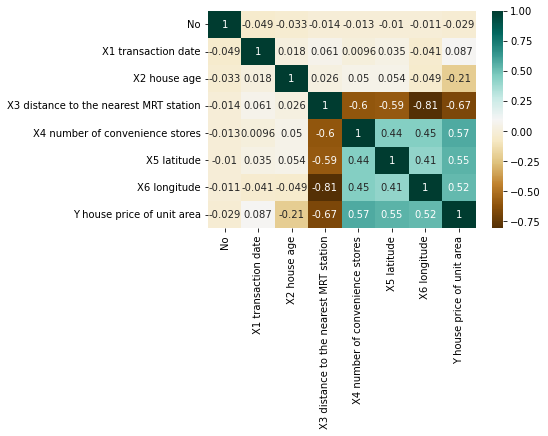

In [7]:
sns.heatmap(c,cmap="BrBG",annot=True)
c

In [8]:
print(df)

      No  X1 transaction date  X2 house age  \
0      1             2012.917          32.0   
1      2             2012.917          19.5   
2      3             2013.583          13.3   
3      4             2013.500          13.3   
4      5             2012.833           5.0   
..   ...                  ...           ...   
409  410             2013.000          13.7   
410  411             2012.667           5.6   
411  412             2013.250          18.8   
412  413             2013.000           8.1   
413  414             2013.500           6.5   

     X3 distance to the nearest MRT station  X4 number of convenience stores  \
0                                  84.87882                               10   
1                                 306.59470                                9   
2                                 561.98450                                5   
3                                 561.98450                                5   
4                                 3

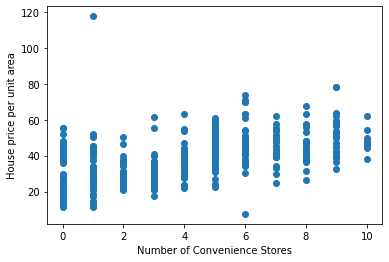

In [9]:
plt.scatter(df['X4 number of convenience stores'],df['Y house price of unit area'])
plt.xlabel("Number of Convenience Stores")
plt.ylabel("House price per unit area")
plt.show()

In [10]:
def mse(m,c,datapts):
    error=0
    a=len(datapts)
    for i in range(a):
        x=datapts.iloc[i]['X4 number of convenience stores']
        y=datapts.iloc[i]['Y house price of unit area']
        error+= pow((y-(m*x+c)),2)
    error=error/a
    #can use for finding mean square error


In [11]:
def gradient_descent(m,c,datapts,alpha):
    init_m=0;init_c=0;
    n=len(datapts)
    for i in range(n):
        x=datapts.iloc[i]['X4 number of convenience stores']
        y=datapts.iloc[i]['Y house price of unit area']
        m_gradient=(-2/n)*x*(y-(m*x+c))
        c_gradient=(-2*n)*(y-(m*x+c))
    m=m-alpha*m_gradient
    c=c-alpha*c_gradient
    return m,c

Equation used: y=0.0033538024473507263x+63.86981380734726


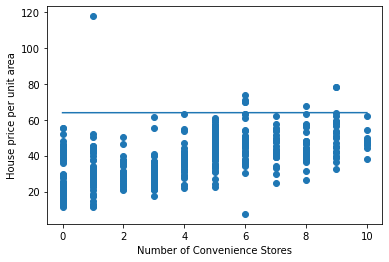

In [15]:
m=0
c=0
alpha=0.0001
epochs=200
for i in range(epochs):
    m,c=gradient_descent(m,c,df,alpha)
print(f"Equation used: y={m}x+{c}")
plt.scatter(df['X4 number of convenience stores'],df['Y house price of unit area'])
plt.xlabel("Number of Convenience Stores")
plt.ylabel("House price per unit area")
plt.plot(list(range(0,11)),[m*x+c for x in range(0,11)])
plt.show()